In [226]:
# scratch notebook

# Fall Detection Model

# Contents

### 1. [Overview](#overview)
### 2. [Business Understanding](#bidness)
### 3. [Data Understanding](#data)
### 4. [Data Preparation](#dataprep)
### 5. [Modeling](#modeling)
####     5.1 [Logistic Regression](# )
####     5.2 [k Nearest Neighbors](# )
####     5.3 [tree based models](# )
####     5.4 [Stacking?](# )
####     5.5 [XG Boost](# )
####     5.6 [Modeling df_feat](# )
### 6. [Final Model Evaluation](#final)
####     6.1 
### 7. [Summary](#summary)

![ ]()

<a id='overview'></a>
# Overview

An elevator pitch
Immediately after the title, write a very short description of the problem you are solving, the data you are using to solve it, and how well your model solves the problem
This should be no more than a couple of sentences

Data: What are the inputs to your model? Think about the contexts where this information would be available
Target: What is your model trying to predict? Is this something that would realistically be unknown in a context where the above features are known?
Rationale: Why would it be valuable to be able to predict this target? Who would find this model useful? How accurate does the model need to be in order to serve the stated purpose?



![ ]()

Ideal dimensions are 1280x640 pixels, but any image with landscape orientation (wider than it is tall) will work
Image sourcing ideas to consider:
Use a stock image from a source like Wikimedia Commons Links to an external site.or UnsplashLinks to an external site.
Make sure you double-check the usage license and attribution requirements
Create visualizations with code (Matplotlib, Seaborn, etc.)

<a id='bidness'></a>
# Business Understanding

Explain the project context, using at least one citation to demonstrate your domain understanding
Consider including visualizations here as well

I am interested in taking raw data from a body-worn sensor on simulated activities, including falls, to create a model that will accurately predict when a person has had a fall or not.  As a former physical therapist who worked in a variety of settings, I believe there is great value in having real-time recognition of a fall event for a patient so staff/family can receive immediate notice and the patient can receive prompt medical attention.  This business challenge applies to the healthcare industry, and could be relevant across the continuum of care, from an acute care hospital environment, to a subacute/rehab setting, a long-term care/nursing home, or even to elderly residents residing alone in the community with family support.  My target audience would ideally include administrators considering better real-time fall monitoring in their facilities, or even to family members of elderly residents living independently.  In addition to the original research that provided this dataset, my analysis would be further proof that this monitoring system can yield accurate and actionable information that would improve patient safety and reduce costly medical complications related to falls.  My domain knowledge includes 15 years of experience as a physical therapist in acute care, rehabs / long term care, outpatient, and home care environments.  I also recently did a __[blog post](https://medium.com/@jonmccaffrey524/deep-learning-and-human-activity-recognition-98cb43da229)__ on deep learning and human activity recognition, and read the __[paper](https://arcoresearch.com/2021/11/23/the-shapes-smart-mirror-approach-for-independent-living-healthy-and-active-ageing/)__ published by the ARCO research group related to their fall monitoring system.  In summary, I am motivated by the fact that falls in healthcare facilities and in the home can be a cause of serious injury and complications for patients / residents, as well as be tremendously costly to our healthcare system.  Though this project doesn’t aim to prevent falls, it does aim to verify accurate diagnosis that a fall has occurred based on sensor-data provided, to help contribute to the goal of improved real-time monitoring and hopefully emergent medical management for someone who has sustained a fall. 

<a id='data'></a>
# Data Understanding

The data I plan to explore and model on comes from theARCO research group in Spain.  It involves activity-monitoring recording of 17 participants undergoing a variety of Activity of Daily Living (ADL) tasks as well as simulated falls.  The data was obtained __[here](https://arcoresearch.com/2021/04/16/dataset-for-fall-detection/)__, and downloaded as a .zip file.  The features include detailed sensor information for acceleration (in g), rotation (in deg/sec), and absolute orientation in Euler angles.  There are 3 different folders of CSV files in total.  Included in the data is a clear target (0 or 1) indicating if a fall occurred during the recording of the activity.     Previous work has been done by the authors, who reference a “machine learning algorithm” they created with “100% accuracy” in a “controlled environment”.  Though the details of the algorithm are vague, I aim to try to replicate their findings while also building my own machine-learning understanding for human activity recognition tasks.  

Subject	Age	Weight(Kg)	Height(m)
1	24	84	1.90
2	27	90	1.70
3	24	69	1.80
4	24	65	1.59
5	43	83	1.77
6	27	65	1.70
7	34	76	1.76
8	42	89	1.84
9	24	65	1.75
10	24	56.2	1.75
11	23	74.3	1.72
12	22	85	1.72
13	41	72	1.65
14	36	80	1.85
15	31	75	1.64
16	22	64.5	1.71
17	43	71	1.76

fall-dataset-features: Each row of this dataset  contains the features used in our study to filter raw data and describe a movement. Each row represents a complete exericse (Fall or ADL)

fall-dataset-raw: Raw data from a one second window when the user perfomed the activity. Each row alone is not relevant because it only contains raw data in a instant of time. In order to get relevant information you must use all the data with the same value on the column index, all this data are part of the same exercise along the time.

fall-dataset-all: On these files, all the data collected when the exercises were performed by the users is saved. It could be useful if you need data out of the one second window. This data is not labeled, but you can use fall-dataset-raw in order to find when a fall or an ADLs were produced. Both fall-dataset-raw and fall-dataset-all have timestamp in order to ease this task.

<a id='dataprep'></a>
# Data Preparation

The .zip file contains 3 folders of CSV files of data.  
- The 1st folder contains 17 CSV files (one for each participant) with all the raw data (11 columns each, 2800 rows each) but summarized/indexed by the task being performed.  
- The 2nd folder contains 17 CSV files with all the features information (25 columns each, 45 rows each - representing summations of each of 45 tasks, including simulated falls)
- The 3rd folder contains 17 CSV files of all the raw data for each participant (10 columns, 30K rows) NOT summarized / indexed by task.

The data types are all numeric (int or float), though that includes a 'feature' variable that represents different tasks / falls, a 'timestamp' variable, and the 0/1 boolean of fall occurrence.  The division between data that represent falls vs. non-fall tasks appears about evenly divided, so there is not a significant class imbalance.  Also, the amount of data available for each task being performed (45 total), for each participant (17 total), appears roughly equal.  The libraries I intend to use include at least Pandas, NumPy, sklearn, matplotlib, and Seaborn.  As far as preprocessing, the data is very clean with no nulls.  Pre-processing may include clustering to see if any groupings can be discerned from that.  It may require scaling and dimensionality reduction as well.  I will need more domain knowledge related to the units of acceleration, rotation, and absolute orientation in Euler angles.  At a minimum, it appears I would utilize the 1st folder (raw data summarized/indexed by task) which contains ~2800 rows per participant.  Visualizations could include confusion matrices and ROC curves for iterative modeling, then separate visuals to represent accuracy by tasks (stacked bar graph?).  I could also do a bar graph for eventual feature importance.  

In [227]:
# can any of these be deleted for the final notebook?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split, cross_validate, KFold, \
cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, \
precision_score, recall_score, accuracy_score, f1_score, \
log_loss, roc_curve, roc_auc_score, classification_report 

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import scikitplot as skplt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from pathlib import Path

import xgboost
import time

## Unzipping folders in Jupyter Notebook

In [228]:
# files too large (~117MB) to save on GitHub unless they remain compressed (~30MB)

In [229]:
#  cd data

In [230]:
# ls

In [231]:
# ! unzip fall-dataset.zip

## Creating a dataframe for fall-dataset-raw

In [232]:
# can replace this pathname with the full path to the folder locally
path_raw = r'C:\Users\JonMc\Documents\Flatiron\Fall_Detection_Model\data\fall-dataset\fall-dataset-raw' 

# Get the files from the path provided
files_raw = Path(path_raw).glob('*.csv') 

In [233]:
# this for loop will create a separate column based on the filename, to separate subjects if needed

dfs_1 = []
for f in files_raw:
    data = pd.read_csv(f)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['File'] = f.stem
    dfs_1.append(data)

In [234]:
# concatenating all 17 files into one dataframe
df_raw = pd.concat(dfs_1, ignore_index=True)

In [235]:
# sanity check
df_raw.head()

,Feature Line,Acc(X),Acc(Y),Acc(Z),Rot(X),Rot(Y),Rot(Z),Pitch,Roll,Yaw,Timestamp,Fall,File
0,1,3.191406,0.768555,8.799805,98.841469,-488.109772,-94.939026,8.554567,68.015976,354.055115,1612546353614,0,Subject1-raw
1,1,2.965820,0.224121,2.638672,-261.890259,-15.853659,-24.634148,7.382404,72.709183,353.782318,1612546353616,0,Subject1-raw
2,1,0.854980,0.500000,0.548828,-337.865875,535.853699,49.817074,7.836745,72.958641,355.967834,1612546353657,0,Subject1-raw
3,1,-1.238770,-2.900391,-6.257324,-254.207321,460.792694,49.817074,10.936003,65.359154,0.667080,1612546353659,0,Subject1-raw
4,1,1.804688,2.567871,-0.529297,741.890259,-307.500000,107.073174,26.398607,61.147324,2.398508,1612546353661,0,Subject1-raw


In [236]:
df_raw.loc[df_raw['Feature Line'] == 34]

,Feature Line,Acc(X),Acc(Y),Acc(Z),Rot(X),Rot(Y),Rot(Z),Pitch,Roll,Yaw,Timestamp,Fall,File
2061,34,1.830078,-3.086426,0.769043,-482.073181,66.402443,20.853659,-3.070647,37.349861,294.698303,1612546973348,1,Subject1-raw
2062,34,0.355957,-2.150391,0.386719,-397.256104,260.548798,235.853668,9.261047,27.617056,298.874664,1612546973350,1,Subject1-raw
2063,34,-0.520508,-0.357422,0.922363,-248.109756,-209.268295,89.207321,9.261047,27.617056,298.874664,1612546973351,1,Subject1-raw
2064,34,2.211426,-4.152832,4.838867,-86.890244,-369.817078,-221.463425,40.616371,18.962431,286.442017,1612546973437,1,Subject1-raw
2065,34,5.927734,-6.823242,1.008789,-207.560974,-229.451218,-303.963409,51.747276,27.424732,283.300171,1612546973481,1,Subject1-raw
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48975,34,-0.273926,-1.191895,0.081055,5.060976,17.682928,-47.195122,83.912910,-16.558981,312.468414,1615568517481,1,Subject9-raw
48976,34,-0.233887,-0.982422,0.109375,-2.134146,8.841464,-48.292683,83.912910,-16.558981,312.468414,1615568517482,1,Subject9-raw
48977,34,-0.011230,-1.018555,-0.014648,-40.731709,-14.085366,-41.341465,84.714806,-13.305731,315.865173,1615568517484,1,Subject9-raw
48978,34,0.066895,-0.602051,-0.152344,-40.121952,1.951220,-37.500000,85.086861,-12.893793,316.383667,1615568517486,1,Subject9-raw


In [237]:
# provide brief summary of each category's meaning here?

### initial EDA for df_raw

In [238]:
df_raw.shape

(49713, 13)

In [239]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49713 entries, 0 to 49712
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Feature Line  49713 non-null  int64  
 1   Acc(X)        49713 non-null  float64
 2   Acc(Y)        49713 non-null  float64
 3   Acc(Z)        49713 non-null  float64
 4   Rot(X)        49713 non-null  float64
 5   Rot(Y)        49713 non-null  float64
 6   Rot(Z)        49713 non-null  float64
 7   Pitch         49713 non-null  float64
 8   Roll          49713 non-null  float64
 9   Yaw           49713 non-null  float64
 10  Timestamp     49713 non-null  int64  
 11  Fall          49713 non-null  int64  
 12  File          49713 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 4.9+ MB


In [240]:
df_raw.describe()

,Feature Line,Acc(X),Acc(Y),Acc(Z),Rot(X),Rot(Y),Rot(Z),Pitch,Roll,Yaw,Timestamp,Fall
count,49713.000000,49713.000000,49713.000000,49713.000000,49713.000000,49713.000000,49713.000000,49713.000000,49713.000000,49713.000000,4.971300e+04,49713.000000
mean,22.405749,0.526012,-0.048381,0.168381,1.511753,1.841931,4.038409,-1.624746,39.261181,202.300937,1.613400e+12,0.409088
std,12.956872,1.045556,0.781739,0.976210,84.624702,132.618225,65.596113,81.993075,39.422234,136.156753,1.865655e+09,0.491671
min,1.000000,-14.330566,-15.739258,-15.999512,-1997.987793,-1997.987793,-768.475647,-179.998138,-87.712242,0.000990,1.608032e+12,0.000000
25%,11.000000,-0.100098,-0.340332,-0.117676,-13.719513,-16.036585,-8.231708,-30.365431,3.811717,58.089073,1.612546e+12,0.000000
50%,22.000000,0.595215,-0.055176,0.179199,0.548781,-0.426829,0.609756,2.950168,53.229465,212.538193,1.613472e+12,0.000000
75%,34.000000,0.984863,0.239746,0.534180,16.951220,19.573172,15.060976,28.444160,74.810349,339.976105,1.614937e+12,1.000000
max,45.000000,15.999512,13.734863,14.244141,1997.987793,1844.207397,1172.012207,179.996017,89.847931,359.997375,1.615570e+12,1.000000


In [241]:
# value counts per subject
df_raw['File'].value_counts()

Subject15-raw    3370
Subject9-raw     3166
Subject2-raw     3150
Subject3-raw     3109
Subject8-raw     3019
Subject13-raw    2935
Subject10-raw    2924
Subject5-raw     2899
Subject14-raw    2897
Subject7-raw     2896
Subject11-raw    2872
Subject17-raw    2847
Subject6-raw     2837
Subject4-raw     2770
Subject1-raw     2755
Subject16-raw    2722
Subject12-raw    2545
Name: File, dtype: int64

In [242]:
# no nulls
df_raw.isna().sum()

Feature Line    0
Acc(X)          0
Acc(Y)          0
Acc(Z)          0
Rot(X)          0
Rot(Y)          0
Rot(Z)          0
Pitch           0
Roll            0
Yaw             0
Timestamp       0
Fall            0
File            0
dtype: int64

## Creating a dataframe for fall-dataset-all

In [243]:
# can replace this pathname with the full path to the folder locally
path_all = r'C:\Users\JonMc\Documents\Flatiron\Fall_Detection_Model\data\fall-dataset\fall-dataset-all' 

# Get the files from the path provided
files_all = Path(path_all).glob('*.csv')

In [244]:
# this for loop will create a separate column based on the filename, to separate subjects if needed

dfs_2 = []
for f in files_all:
    data = pd.read_csv(f)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['File'] = f.stem
    dfs_2.append(data)

In [245]:
# concatenating all 17 files into one dataframe
df_all = pd.concat(dfs_2, ignore_index=True)

In [246]:
# sanity check
df_all.head()

,Acc(X),Acc(Y),Acc(Z),Rot(X),Rot(Y),Rot(Z),Pitch,Roll,Yaw,Timestamp,File
0,0.932617,-0.166504,0.411133,3.231707,-2.865854,3.536585,9.411585,64.421898,359.941193,1612546351138,Subject1-raw-all
1,0.934570,-0.166016,0.398926,3.109756,-1.280488,3.353659,9.430594,64.434891,359.882324,1612546351140,Subject1-raw-all
2,0.938477,-0.170410,0.387207,2.317073,-0.609756,2.987805,9.448231,64.434715,359.828003,1612546351141,Subject1-raw-all
3,0.937988,-0.176270,0.380371,2.195122,-0.731707,2.621951,9.465791,64.432030,359.783264,1612546351182,Subject1-raw-all
4,0.937012,-0.173340,0.384766,2.195122,-1.463415,2.256098,9.481668,64.436104,359.742218,1612546351184,Subject1-raw-all


In [247]:
# brief explanation for columns

### Initial EDA for df_all

In [248]:
df_all.shape

(678715, 11)

In [249]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678715 entries, 0 to 678714
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Acc(X)     678715 non-null  float64
 1   Acc(Y)     678715 non-null  float64
 2   Acc(Z)     678715 non-null  float64
 3   Rot(X)     678715 non-null  float64
 4   Rot(Y)     678715 non-null  float64
 5   Rot(Z)     678715 non-null  float64
 6   Pitch      678715 non-null  float64
 7   Roll       678715 non-null  float64
 8   Yaw        678715 non-null  float64
 9   Timestamp  678715 non-null  int64  
 10  File       678715 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 57.0+ MB


In [250]:
df_all.describe()

,Acc(X),Acc(Y),Acc(Z),Rot(X),Rot(Y),Rot(Z),Pitch,Roll,Yaw,Timestamp
count,678715.000000,678715.000000,678715.000000,678715.000000,678715.000000,678715.000000,678715.000000,678715.000000,678715.000000,6.787150e+05
mean,0.719117,-0.037409,0.194582,0.332711,-0.220278,0.391412,-8.048431,53.698468,208.737719,1.613281e+12
std,0.522161,0.411668,0.480294,39.153883,48.799114,27.166656,83.289489,32.290934,134.460734,1.891624e+09
min,-14.330566,-15.739258,-15.999512,-1997.987793,-1997.987793,-768.475647,-179.998886,-87.712242,-0.000000,1.608032e+12
25%,0.580078,-0.250488,-0.009766,-5.487805,-4.878049,-2.743902,-18.488931,41.500603,70.778984,1.611079e+12
50%,0.907227,-0.034180,0.196777,0.548781,-0.365854,0.365854,2.222400,64.662773,239.999176,1.613472e+12
75%,0.994629,0.158691,0.447266,6.463415,3.475610,3.353659,24.504577,77.857861,341.061996,1.614937e+12
max,15.999512,13.734863,14.244141,1997.987793,1844.207397,1172.012207,179.999420,89.991936,359.999176,1.615570e+12


In [251]:
df_all['File'].value_counts()

Subject15-raw-all    75650
Subject2-raw-all     57617
Subject8-raw-all     53069
Subject14-raw-all    47176
Subject9-raw-all     43937
Subject7-raw-all     43639
Subject10-raw-all    39043
Subject17-raw-all    38285
Subject12-raw-all    37134
Subject3-raw-all     34303
Subject4-raw-all     34194
Subject5-raw-all     32879
Subject13-raw-all    32634
Subject11-raw-all    29949
Subject1-raw-all     29551
Subject6-raw-all     25949
Subject16-raw-all    23706
Name: File, dtype: int64

In [252]:
df_all.isna().sum()

Acc(X)       0
Acc(Y)       0
Acc(Z)       0
Rot(X)       0
Rot(Y)       0
Rot(Z)       0
Pitch        0
Roll         0
Yaw          0
Timestamp    0
File         0
dtype: int64

## Creating a dataframe for fall-dataset-features

In [253]:
# can replace this pathname with the full path to the folder locally
path_feat = r'C:\Users\JonMc\Documents\Flatiron\Fall_Detection_Model\data\fall-dataset\fall-dataset-features' 

# Get the files from the path provided
files_feat = Path(path_feat).glob('*.csv')

In [254]:
# this for loop will create a separate column based on the filename, to separate subjects if needed

dfs_3 = []
for f in files_feat:
    data = pd.read_csv(f)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['File'] = f.stem
    dfs_3.append(data)

In [255]:
# concatenating all 17 files into one dataframe
df_feat = pd.concat(dfs_3, ignore_index=True)

In [256]:
# sanity check
df_feat.head()

,Index,Acceleration Mean,Rotation Mean,Acceleration Variance,Rotation Variance,Acc Y Mean,Acc Z Mean,Rot Y Mean,Rot Z Mean,Max Acceleration,...,Yaw,Timestamp,Fall,Acc Y Stdev,Acc Z Stdev,Rot Y Stdev,Rot Z Stdev,Fourier Acc Coef,Fourier Rot Coef,File
0,1,1.300608,41.745840,1.274991,148.636248,-0.125055,0.453730,3.412917,1.036585,9.392141,...,358.229492,1612546353614,0,0.483726,1.312748,109.027999,19.364234,92.343149,2963.954659,Subject1
1,2,1.239625,52.031510,1.069585,195.726419,-0.089449,0.413064,6.641859,1.184541,7.485130,...,359.792999,1612546357756,0,0.391341,1.206264,175.210145,6.265235,84.294529,3538.142670,Subject1
2,3,1.529465,89.170260,1.733220,262.935521,-0.087678,0.515523,7.205940,4.921322,11.018893,...,0.008551,1612546361670,0,1.210065,1.427617,154.932945,40.829397,94.826840,5528.556094,Subject1
3,4,1.060228,10.202447,0.237082,39.333528,-0.130035,0.457962,-6.646342,0.395517,2.969044,...,358.421753,1612546366033,0,0.064298,0.280493,35.358783,3.789023,78.456869,754.981105,Subject1
4,5,1.222219,30.061889,1.283746,120.337842,-0.140402,0.477546,-13.010453,0.682056,11.576874,...,357.713165,1612546370850,0,0.250743,1.194289,95.576180,6.248497,85.555305,2104.332225,Subject1


In [257]:
df_feat.head(50)

# demos repeating 'Index' of 45, separating tasks

,Index,Acceleration Mean,Rotation Mean,Acceleration Variance,Rotation Variance,Acc Y Mean,Acc Z Mean,Rot Y Mean,Rot Z Mean,Max Acceleration,...,Yaw,Timestamp,Fall,Acc Y Stdev,Acc Z Stdev,Rot Y Stdev,Rot Z Stdev,Fourier Acc Coef,Fourier Rot Coef,File
0,1,1.300608,41.745840,1.274991,148.636248,-0.125055,0.453730,3.412917,1.036585,9.392141,...,358.229492,1612546353614,0,0.483726,1.312748,109.027999,19.364234,92.343149,2963.954659,Subject1
1,2,1.239625,52.031510,1.069585,195.726419,-0.089449,0.413064,6.641859,1.184541,7.485130,...,359.792999,1612546357756,0,0.391341,1.206264,175.210145,6.265235,84.294529,3538.142670,Subject1
2,3,1.529465,89.170260,1.733220,262.935521,-0.087678,0.515523,7.205940,4.921322,11.018893,...,0.008551,1612546361670,0,1.210065,1.427617,154.932945,40.829397,94.826840,5528.556094,Subject1
3,4,1.060228,10.202447,0.237082,39.333528,-0.130035,0.457962,-6.646342,0.395517,2.969044,...,358.421753,1612546366033,0,0.064298,0.280493,35.358783,3.789023,78.456869,754.981105,Subject1
4,5,1.222219,30.061889,1.283746,120.337842,-0.140402,0.477546,-13.010453,0.682056,11.576874,...,357.713165,1612546370850,0,0.250743,1.194289,95.576180,6.248497,85.555305,2104.332225,Subject1
5,6,1.586209,67.890393,2.247315,114.878237,-0.179645,0.559630,2.859436,-2.373770,14.055819,...,357.156738,1612546396631,0,0.639304,1.327880,110.568531,36.473423,90.413899,3869.752428,Subject1
6,7,1.512595,81.585007,1.620114,119.763670,-0.133317,0.639488,-12.511995,-7.885846,10.525451,...,350.824646,1612546401765,0,0.846939,1.248835,84.071822,33.797201,92.268325,4976.685438,Subject1
7,8,1.340308,57.541038,1.445330,94.965213,-0.235703,0.578407,5.504955,0.401105,10.616751,...,354.565460,1612546407119,0,0.439014,0.708348,90.423817,14.957783,85.779725,3682.626427,Subject1
8,9,1.375997,95.503753,1.227727,153.677428,-0.089980,0.435035,13.422632,-2.480008,7.254419,...,343.955811,1612546412113,0,0.744411,1.305662,117.593817,46.316231,83.935810,5825.728905,Subject1
9,10,1.151627,111.083964,1.445851,97.440283,-0.073564,0.394385,-22.507318,-2.796342,7.307068,...,341.684204,1612546416437,0,0.471556,1.210703,111.013056,32.379890,57.581350,5554.198210,Subject1


In [258]:
# explanation of columns

### Initial EDA for df_feat

In [259]:
df_feat.shape

(765, 26)

In [260]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Index                  765 non-null    int64  
 1   Acceleration Mean      765 non-null    float64
 2   Rotation Mean          765 non-null    float64
 3   Acceleration Variance  765 non-null    float64
 4   Rotation Variance      765 non-null    float64
 5   Acc Y Mean             765 non-null    float64
 6   Acc Z Mean             765 non-null    float64
 7   Rot Y Mean             765 non-null    float64
 8   Rot Z Mean             765 non-null    float64
 9   Max Acceleration       765 non-null    float64
 10  Max Rotation           765 non-null    float64
 11  First Acceleration     765 non-null    float64
 12  Last Acceleration      765 non-null    float64
 13  Fall Time              765 non-null    int64  
 14  Pitch                  765 non-null    float64
 15  Roll  

In [261]:
df_feat.describe()

,Index,Acceleration Mean,Rotation Mean,Acceleration Variance,Rotation Variance,Acc Y Mean,Acc Z Mean,Rot Y Mean,Rot Z Mean,Max Acceleration,...,Roll,Yaw,Timestamp,Fall,Acc Y Stdev,Acc Z Stdev,Rot Y Stdev,Rot Z Stdev,Fourier Acc Coef,Fourier Rot Coef
count,765.00000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,...,765.000000,765.000000,7.650000e+02,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,23.00000,1.291181,91.264983,1.021121,114.649928,-0.065314,0.160678,1.521893,5.011623,6.687504,...,35.117611,211.507451,1.613418e+12,0.437908,0.514702,0.727502,107.458123,50.464953,83.186551,5740.832684
std,12.99567,0.196225,51.953837,0.536389,75.321626,0.495275,0.535250,33.470903,29.496195,3.536698,...,40.464925,132.904788,1.816585e+09,0.496454,0.370574,0.433159,70.714445,34.752515,18.708207,3260.002571
min,1.00000,0.852751,4.126064,0.174386,15.431657,-1.333600,-1.361850,-149.817077,-115.042328,1.844608,...,-66.699471,0.008551,1.608032e+12,0.000000,0.009248,0.057813,10.448235,1.059858,9.258738,272.320192
25%,12.00000,1.146914,47.920742,0.620723,62.434765,-0.363540,-0.106187,-12.703253,-4.886760,4.008378,...,-0.795930,80.633316,1.612546e+12,0.000000,0.233469,0.416951,57.042946,20.353484,72.776846,2963.925784
50%,23.00000,1.241952,90.161143,0.908397,97.786643,-0.051208,0.196339,1.879158,1.897280,5.724824,...,38.712997,245.695786,1.613472e+12,0.000000,0.424046,0.633626,90.829730,44.590093,81.318565,5690.806673
75%,34.00000,1.394088,125.834012,1.303673,139.346576,0.244643,0.575195,18.925449,15.962060,8.448593,...,74.385406,340.452087,1.614937e+12,1.000000,0.688784,0.927536,134.929506,74.999191,93.476663,7838.591800
max,45.00000,2.288287,305.700631,3.335482,525.954520,1.134824,1.211130,111.674966,141.338815,21.817957,...,88.928444,359.993896,1.615570e+12,1.000000,2.218621,2.507445,402.570204,165.500142,168.842018,20555.704507


In [262]:
df_feat['Fall'].value_counts()

0    430
1    335
Name: Fall, dtype: int64

In [263]:
# just to visualize what IS 'Fall Time'?  Dropped all columns up to that column

df_fall_time = df_feat.drop(df_feat.loc[:, 'Acceleration Mean':'Last Acceleration'], axis = 1)
df_fall_time.head()

,Index,Fall Time,Pitch,Roll,Yaw,Timestamp,Fall,Acc Y Stdev,Acc Z Stdev,Rot Y Stdev,Rot Z Stdev,Fourier Acc Coef,Fourier Rot Coef,File
0,1,47,8.950751,64.438660,358.229492,1612546353614,0,0.483726,1.312748,109.027999,19.364234,92.343149,2963.954659,Subject1
1,2,45,8.138635,64.625198,359.792999,1612546357756,0,0.391341,1.206264,175.210145,6.265235,84.294529,3538.142670,Subject1
2,3,88,8.271803,65.233681,0.008551,1612546361670,0,1.210065,1.427617,154.932945,40.829397,94.826840,5528.556094,Subject1
3,4,2,6.795074,71.329956,358.421753,1612546366033,0,0.064298,0.280493,35.358783,3.789023,78.456869,754.981105,Subject1
4,5,43,6.452204,67.986809,357.713165,1612546370850,0,0.250743,1.194289,95.576180,6.248497,85.555305,2104.332225,Subject1


In [264]:
df_feat['File'].value_counts()

Subject1     45
Subject2     45
Subject8     45
Subject7     45
Subject6     45
Subject5     45
Subject4     45
Subject3     45
Subject17    45
Subject10    45
Subject16    45
Subject15    45
Subject14    45
Subject13    45
Subject12    45
Subject11    45
Subject9     45
Name: File, dtype: int64

## Data preparation for df_raw

In [265]:
#explain why focusing on df_raw specifically

In [266]:
df_raw.head()

,Feature Line,Acc(X),Acc(Y),Acc(Z),Rot(X),Rot(Y),Rot(Z),Pitch,Roll,Yaw,Timestamp,Fall,File
0,1,3.191406,0.768555,8.799805,98.841469,-488.109772,-94.939026,8.554567,68.015976,354.055115,1612546353614,0,Subject1-raw
1,1,2.965820,0.224121,2.638672,-261.890259,-15.853659,-24.634148,7.382404,72.709183,353.782318,1612546353616,0,Subject1-raw
2,1,0.854980,0.500000,0.548828,-337.865875,535.853699,49.817074,7.836745,72.958641,355.967834,1612546353657,0,Subject1-raw
3,1,-1.238770,-2.900391,-6.257324,-254.207321,460.792694,49.817074,10.936003,65.359154,0.667080,1612546353659,0,Subject1-raw
4,1,1.804688,2.567871,-0.529297,741.890259,-307.500000,107.073174,26.398607,61.147324,2.398508,1612546353661,0,Subject1-raw


df_raw does have a target, but also more individual data points to consider rather than summary statistics.  More granularity (but also more dimensions) in df_raw
1 second intervals 

df_feat is the summary of each task per individual (45 tasks x 17 individuals).  It has summary info of the main numeric categories, including mean, variance, coefs, and st dev.  

and df_all is ALL the raw data with no target.  (could i discern the target by calculating/checking the means myself).  Real life WOULD be more the raw data

In [267]:
# making a copy of df-raw to use for modeling
df = df_raw.copy()
df.shape

(49713, 13)

In [268]:
# dropping timestamp, won't use

In [269]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [270]:
df.shape

(49713, 12)

In [271]:
# have to remove 'Feature Line' as well since that indicates the type of 
# activity being performed, and therefore whether or not it is a simulated fall

# the type of activity would not be known outside of a controlled experimental
# environment

df.corr()['Fall']

C:\Users\JonMc\AppData\Local\Temp\ipykernel_27036\3143895034.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Fall']


Feature Line    0.852675
Acc(X)         -0.444877
Acc(Y)          0.035396
Acc(Z)         -0.096861
Rot(X)         -0.042177
Rot(Y)          0.027612
Rot(Z)         -0.015038
Pitch          -0.111226
Roll           -0.794995
Yaw            -0.151548
Fall            1.000000
Name: Fall, dtype: float64

In [272]:
df.drop(['Feature Line'], axis=1, inplace=True)

In [273]:
# keeping 'File' - will treat as categorical. That differentiates one
# individual from another - In the future, would the monitoring system be able to 'learn'
# an individual's behavior?  So what might appear as an outlier compared to another user at first wouldn't be in the future?

# and 'Fall' is the target

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49713 entries, 0 to 49712
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Acc(X)  49713 non-null  float64
 1   Acc(Y)  49713 non-null  float64
 2   Acc(Z)  49713 non-null  float64
 3   Rot(X)  49713 non-null  float64
 4   Rot(Y)  49713 non-null  float64
 5   Rot(Z)  49713 non-null  float64
 6   Pitch   49713 non-null  float64
 7   Roll    49713 non-null  float64
 8   Yaw     49713 non-null  float64
 9   Fall    49713 non-null  int64  
 10  File    49713 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 4.2+ MB


<a id='modeling'></a>
# Modeling

What kind of model(s) did you use?
How well did your final model perform, compared to the baseline?

Modeling will involve the use of a train-test split, a baseline dummy classifier, then pipelines and cross-validation for logistic regression, kNN, decision trees / random forest, grid searches, XG boosting.  My target variable is the defined 0 or 1 for whether a fall occurred in that segment of testing, which indicates a binary classification problem.  My local computer should be sufficient for this, as it was in phase 3, but I am open to using Google Colab  if I need additional computing power, or if the processing speed on my own computer is woefully slow.  My data will be stored on my local machine.

## Pre-processing for df_raw

Train-test split, pipelines with scaling, exploratory clustering

### Train-test split

In [275]:
# explain target

In [276]:
X = df.drop(['Fall'], axis=1)
y = df['Fall']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [277]:
X_train.shape

(37284, 10)

In [278]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37284 entries, 8308 to 45474
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Acc(X)  37284 non-null  float64
 1   Acc(Y)  37284 non-null  float64
 2   Acc(Z)  37284 non-null  float64
 3   Rot(X)  37284 non-null  float64
 4   Rot(Y)  37284 non-null  float64
 5   Rot(Z)  37284 non-null  float64
 6   Pitch   37284 non-null  float64
 7   Roll    37284 non-null  float64
 8   Yaw     37284 non-null  float64
 9   File    37284 non-null  object 
dtypes: float64(9), object(1)
memory usage: 3.1+ MB


In [279]:
y_train.shape

(37284,)

### Pipelines and ColumnTransformer

#### ColumnTransformer

In [280]:
subpipe_num = Pipeline(steps=[('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [281]:
num_feats = list(X_train.select_dtypes(include=['float64']).columns)
cat_feats = ['File']

In [282]:
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, num_feats),
                                     ('subpipe_cat', subpipe_cat, cat_feats)],
                                     remainder='passthrough')

In [283]:
# CT.fit_transform(X_train).shape

In [284]:
# X_train.shape

# so added 16 OHE columns above

### Scaling - (can delete all this - ended up doing separate pipeline for PCA)

#### Pipeline and FunctionTransformer for scaling

In [285]:
# including only float64 data from df

def grab_float(df):
    return df.select_dtypes(include=['float64'])

In [286]:
GrabFloat = FunctionTransformer(grab_float)

In [287]:
pipe = Pipeline(steps=[('flt', GrabFloat),
                       ('ss', StandardScaler())])

In [288]:
pipe.fit(X_train)

Pipeline(steps=[('flt',
                 FunctionTransformer(func=<function grab_float at 0x000001FC9FD7AC20>)),
                ('ss', StandardScaler())])

In [289]:
pipe.transform(X_train).shape

(37284, 9)

In [290]:
X_scale = pipe.transform(X_train)
X_scale

array([[-1.18859279,  0.35892826,  0.58842298, ...,  0.05181948,
        -1.74659284,  1.13849818],
       [ 0.48988555,  0.18983063, -0.18302417, ..., -0.04753906,
         1.1367719 , -0.31377345],
       [-0.47548339,  0.07997888, -0.14702663, ...,  0.01436752,
         1.2169817 ,  1.07441789],
       ...,
       [-0.58883759,  0.16082483, -0.24002026, ..., -0.22345213,
         0.74549629,  1.07566122],
       [ 0.45272024, -0.04715292,  0.1414536 , ...,  0.20102511,
         0.09031887, -0.84065141],
       [-0.81740425,  0.6786092 , -0.7064883 , ..., -1.71882754,
        -1.03036112,  0.84849222]])

In [291]:
X_scale_df = pd.DataFrame(X_scale, columns = X_train.drop(['File'], axis=1).columns)
X_scale_df

,Acc(X),Acc(Y),Acc(Z),Rot(X),Rot(Y),Rot(Z),Pitch,Roll,Yaw
0,-1.188593,0.358928,0.588423,-0.339516,0.105175,-0.244688,0.051819,-1.746593,1.138498
1,0.489886,0.189831,-0.183024,0.142507,-0.139070,-0.118336,-0.047539,1.136772,-0.313773
2,-0.475483,0.079979,-0.147027,-0.239365,-0.022436,-0.169434,0.014368,1.216982,1.074418
3,0.392791,-0.223656,-0.450506,-0.021770,0.010496,-0.059805,2.050999,0.762829,1.132524
4,-0.190704,0.716255,-1.056464,0.142507,-0.151877,-0.070953,-1.795844,-0.544521,0.926434
...,...,...,...,...,...,...,...,...,...
37279,0.449933,0.158356,0.018462,-0.008801,-0.017862,-0.045869,-0.030079,0.998724,1.142598
37280,-0.292444,1.071113,-0.385010,-0.400760,-0.789017,-0.643257,-1.298210,-0.412781,-0.954739
37281,-0.588838,0.160825,-0.240020,0.401891,-0.091044,0.121363,-0.223452,0.745496,1.075661
37282,0.452720,-0.047153,0.141454,-0.846757,-0.030669,-0.929408,0.201025,0.090319,-0.840651


In [292]:
y_train.shape

(37284,)

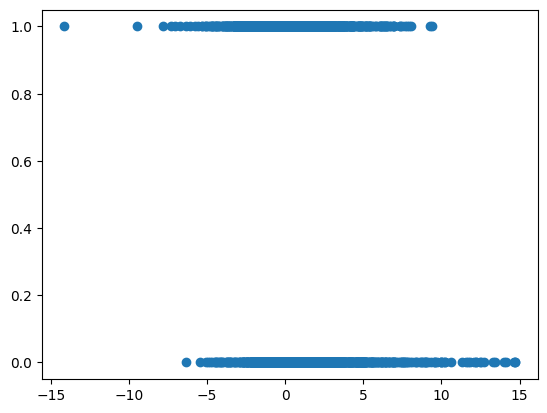

In [293]:
fig, ax = plt.subplots()
ax.scatter(X_scale_df['Acc(X)'], y_train);

In [294]:
# These individual X vs y plots will all look like sigmoid functions if y is
# only 0 or 1

#### PCA

Will create a different ColumnTransformer to include all aspects of df_raw, NOT just X_train

In [295]:
subpipe_num_PCA = Pipeline(steps=[('ss', StandardScaler())])

In [296]:
num_feats_PCA = list(df_raw.select_dtypes(include='number').columns)

In [297]:
CT_PCA = ColumnTransformer(transformers=[('subpipe_num_PCA', subpipe_num_PCA, num_feats_PCA)])

In [298]:
# keeping to n_components=2 to visualize
pca = PCA(n_components=2, random_state=24)

In [299]:
df_raw.head()

,Feature Line,Acc(X),Acc(Y),Acc(Z),Rot(X),Rot(Y),Rot(Z),Pitch,Roll,Yaw,Timestamp,Fall,File
0,1,3.191406,0.768555,8.799805,98.841469,-488.109772,-94.939026,8.554567,68.015976,354.055115,1612546353614,0,Subject1-raw
1,1,2.965820,0.224121,2.638672,-261.890259,-15.853659,-24.634148,7.382404,72.709183,353.782318,1612546353616,0,Subject1-raw
2,1,0.854980,0.500000,0.548828,-337.865875,535.853699,49.817074,7.836745,72.958641,355.967834,1612546353657,0,Subject1-raw
3,1,-1.238770,-2.900391,-6.257324,-254.207321,460.792694,49.817074,10.936003,65.359154,0.667080,1612546353659,0,Subject1-raw
4,1,1.804688,2.567871,-0.529297,741.890259,-307.500000,107.073174,26.398607,61.147324,2.398508,1612546353661,0,Subject1-raw


In [300]:
PCA_array = CT_PCA.fit_transform(df_raw.drop(['File'], axis=1))
PCA_array

# removed 'File' to avoid sparse matrix, and having to use
# TruncatedSVD.  ANd so went back and removed pipeline with OHE

array([[-1.65209356,  2.54928604,  1.04503331, ...,  1.11456612,
        -0.45761757, -0.83204557],
       [-1.65209356,  2.33352697,  0.34858755, ...,  1.11256256,
        -0.45761757, -0.83204557],
       [-1.65209356,  0.31463852,  0.70149504, ...,  1.12861419,
        -0.45761755, -0.83204557],
       ...,
       [ 1.74382202, -0.2691252 , -0.15984909, ..., -0.28216674,
         1.1624988 ,  1.20185724],
       [ 1.74382202, -0.4265079 , -0.12799373, ..., -0.28150038,
         1.1624988 ,  1.20185724],
       [ 1.74382202, -0.45919867, -0.0730276 , ..., -0.28140154,
         1.16249885,  1.20185724]])

In [301]:
X_pca = pca.fit_transform(PCA_array)

In [302]:
X_pca.shape

(49713, 2)

In [303]:
pca.explained_variance_ratio_

# the top 2 components only explain about 39% of the variance

array([0.25231752, 0.1388462 ])

#### KMeans Clustering

In [304]:
# will set n_clusters to 17 due to 17 participants in study

kmeans = KMeans(n_clusters=17, n_init=10, random_state=24)

In [305]:
label = kmeans.fit_predict(X_pca)
print(label)

[16  7 15 ... 13 13 13]


In [306]:
#filter rows of original data
filtered_label0 = X_pca[label == 0]
filtered_label0

array([[-1.52995484, -0.76145894],
       [-1.36522206, -0.03798385],
       [-1.37470763, -0.02718047],
       ...,
       [-0.92046762, -0.3705438 ],
       [-1.39060945, -0.30834599],
       [-1.12296662, -0.36206021]])

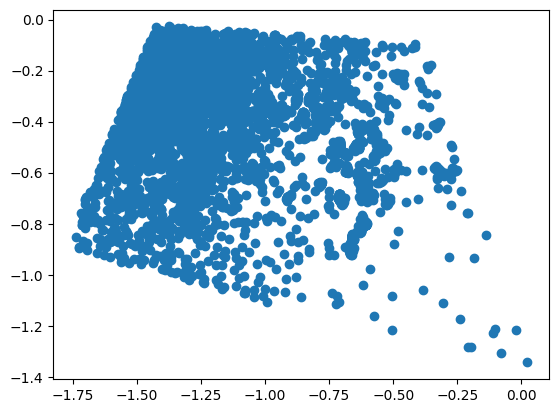

In [307]:
#plotting the results for one label
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

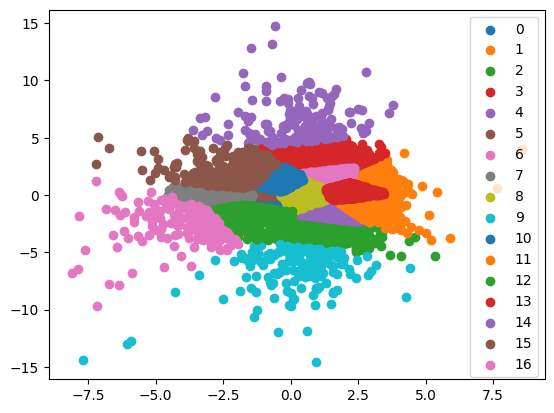

In [308]:
#Getting unique labels and plotting all
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

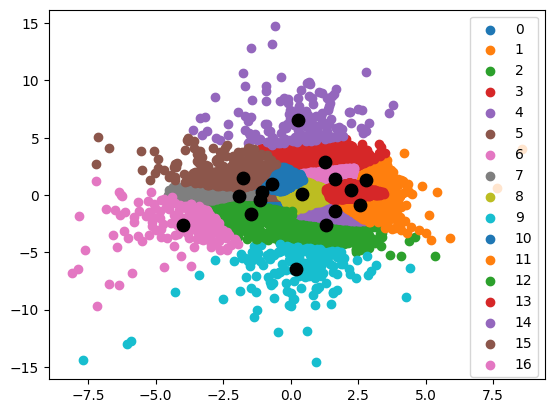

In [309]:
# Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [310]:
# how do I interpret that?

## DummyClassifier

Creating a dummy model that will return the most common target

In [311]:
df['Fall'].value_counts(normalize=True)

# Note '0' is 59% of the total values

0    0.590912
1    0.409088
Name: Fall, dtype: float64

In [312]:
dummy_model = DummyClassifier(strategy='most_frequent')

In [313]:
# leaving out 'File'
X_tr_num= X_train.select_dtypes(include='float64')
X_tr_num

,Acc(X),Acc(Y),Acc(Z),Rot(X),Rot(Y),Rot(Z),Pitch,Roll,Yaw
8308,-0.720703,0.235840,0.743652,-27.134148,16.097561,-12.134147,2.906763,-29.597702,357.378632
11906,1.043457,0.102051,-0.009766,13.658537,-16.463415,-3.841464,-5.234757,84.123871,159.863800
47091,0.028809,0.015137,0.025391,-18.658537,-0.914634,-7.195122,-0.162081,87.287392,348.663452
18432,0.941406,-0.225098,-0.270996,-0.243902,3.475610,0.000000,166.721191,69.375359,356.566071
1839,0.328125,0.518555,-0.862793,13.658537,-18.170732,-0.731707,-148.492294,17.812698,328.536987
...,...,...,...,...,...,...,...,...,...
21633,1.001465,0.077148,0.187012,0.853659,-0.304878,0.914634,-3.804095,78.679192,357.936279
19857,0.221191,0.799316,-0.207031,-32.317074,-103.109756,-38.292683,-107.715790,23.008615,72.689850
14528,-0.090332,0.079102,-0.065430,35.609756,-10.060976,11.890244,-19.649218,68.691734,348.832550
899,1.004395,-0.085449,0.307129,-70.060974,-2.012195,-57.073174,15.132795,42.851158,88.206261


In [314]:
dummy_model.fit(X_tr_num, y_train)

DummyClassifier(strategy='most_frequent')

In [463]:
dummy_pred = dummy_model.predict(X_tr_num)
dummy_pred

# predicts all zeros (no falls)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [452]:
dummy_cv = cross_val_score(dummy_model, X_tr_num, y_train, cv=5)
dummy_cv.mean()

# 59.3% accurate

0.5932035192039511

In [317]:
dummy_score = dummy_cv.mean()

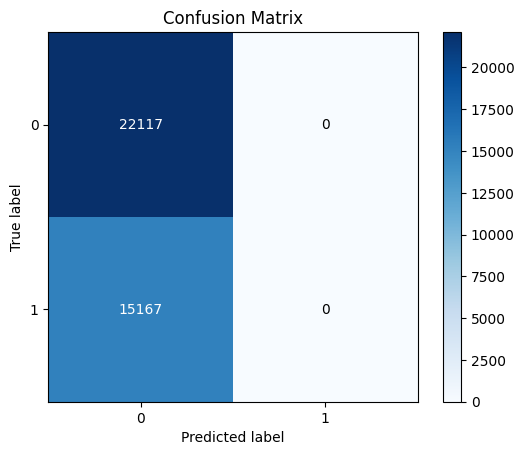

In [464]:
skplt.metrics.plot_confusion_matrix(y_train, dummy_pred, normalize=False)
plt.show()

In [465]:
# double-checking number of false negatives in dummy model

(1 - dummy_score) * len(X_tr_num)

15166.999989999887

## Simple Logistic Regression

In [318]:
begin = time.time()
logreg1 = Pipeline(steps=[('ct', CT),
                            ('logreg1', LogisticRegression(random_state=24))])
logreg1.fit(X_train, y_train)
y_log1_pred = logreg1.predict(X_train)
end = time.time()
logreg1_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {logreg1_time} seconds.
""")


The total time to fit and predict for this model is 0.1219 seconds.



In [319]:
logreg1_scores = cross_validate(logreg1, X_train, y_train, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

In [320]:
class results:
    
    def __init__(self, data):
        self._train_accuracy = data['train_accuracy'].mean()
        self._test_accuracy = data['test_accuracy'].mean()
        self._train_recall = data['train_recall'].mean()
        self._test_recall = data['test_recall'].mean()
        self._train_precision = data['train_precision'].mean()
        self._test_precision = data['test_precision'].mean()
        self._train_f1 = data['train_f1'].mean()
        self._test_f1 = data['test_f1'].mean()

In [321]:
def print_results(model):
    print(f"""
    The mean train accuracy score is {(round(model._train_accuracy, 4))}.
    The mean test accuracy score is {(round(model._test_accuracy, 4))}. \n
    The mean train recall score is {(round(model._train_recall, 4))}.
    The mean test recall score is {(round(model._test_recall, 4))}. \n
    The mean train precision score is {(round(model._train_precision, 4))}.
    The mean test precision score is {(round(model._test_precision, 4))}. \n
    The mean train f1 score is {(round(model._train_f1, 4))}.
    The mean test f1 score is {(round(model._test_f1, 4))}.
    """)

In [322]:
logreg1_results = results(logreg1_scores)

In [458]:
logreg1_scores['test_accuracy'].mean()

0.9203143624304382

In [456]:
logreg1_results._test_accuracy

0.9203143624304382

In [323]:
print_results(logreg1_results)


    The mean train accuracy score is 0.9209.
    The mean test accuracy score is 0.9203. 

    The mean train recall score is 0.891.
    The mean test recall score is 0.8894. 

    The mean train precision score is 0.9124.
    The mean test precision score is 0.9125. 

    The mean train f1 score is 0.9016.
    The mean test f1 score is 0.9008.
    


In [324]:
# logreg1_model_pipe.named_steps

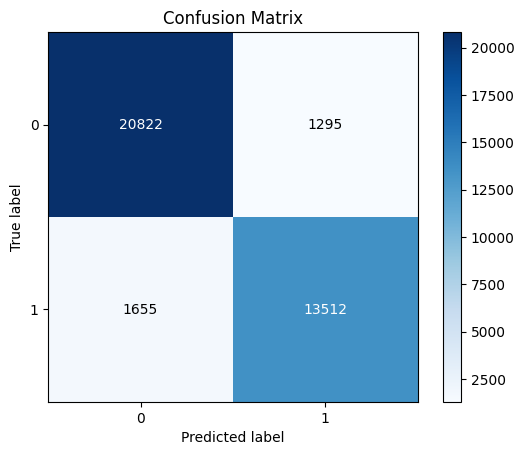

In [325]:
skplt.metrics.plot_confusion_matrix(y_train, y_log1_pred, normalize=False)
plt.show()

In [326]:
print(classification_report(y_train, y_log1_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     22117
           1       0.91      0.89      0.90     15167

    accuracy                           0.92     37284
   macro avg       0.92      0.92      0.92     37284
weighted avg       0.92      0.92      0.92     37284



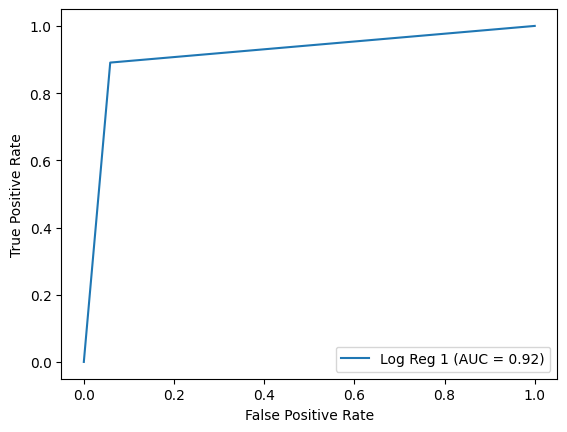

In [327]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_log1_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Log Reg 1')
display.plot()
plt.show()

## Tuned Logistic Regression

Adding max_iter=1000, and stronger regularization (C=0.01)

In [328]:
begin = time.time()
logreg2 = Pipeline(steps=[('ct', CT),
                            ('logreg2', LogisticRegression(
                                max_iter = 1000,
                                C=0.01,
                                random_state=24))])
logreg2.fit(X_train, y_train)
y_log2_pred = logreg2.predict(X_train)
end = time.time()
logreg2_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {logreg2_time} seconds.
""")


The total time to fit and predict for this model is 0.1056 seconds.



In [329]:
logreg2_scores = cross_validate(logreg2, X_train, y_train, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

In [330]:
logreg2_results = results(logreg2_scores)

In [331]:
print_results(logreg2_results)


    The mean train accuracy score is 0.9224.
    The mean test accuracy score is 0.9223. 

    The mean train recall score is 0.8891.
    The mean test recall score is 0.889. 

    The mean train precision score is 0.9176.
    The mean test precision score is 0.9175. 

    The mean train f1 score is 0.9031.
    The mean test f1 score is 0.903.
    


In [200]:
# logreg2.named_steps

{'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('subpipe_num',
                                  Pipeline(steps=[('ss', StandardScaler())]),
                                  ['Acc(X)', 'Acc(Y)', 'Acc(Z)', 'Rot(X)',
                                   'Rot(Y)', 'Rot(Z)', 'Pitch', 'Roll', 'Yaw']),
                                 ('subpipe_cat',
                                  Pipeline(steps=[('ohe',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['File'])]),
 'logreg2': LogisticRegression(C=0.01, max_iter=1000, random_state=24)}

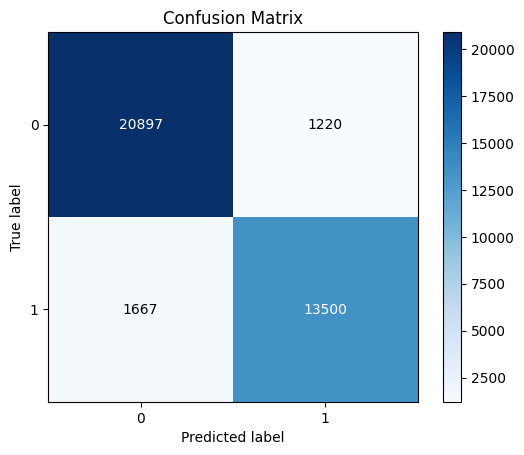

In [332]:
skplt.metrics.plot_confusion_matrix(y_train, y_log2_pred, normalize=False)
plt.show()

In [208]:
print(classification_report(y_train, y_log2_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     22117
           1       0.92      0.89      0.90     15167

    accuracy                           0.92     37284
   macro avg       0.92      0.92      0.92     37284
weighted avg       0.92      0.92      0.92     37284



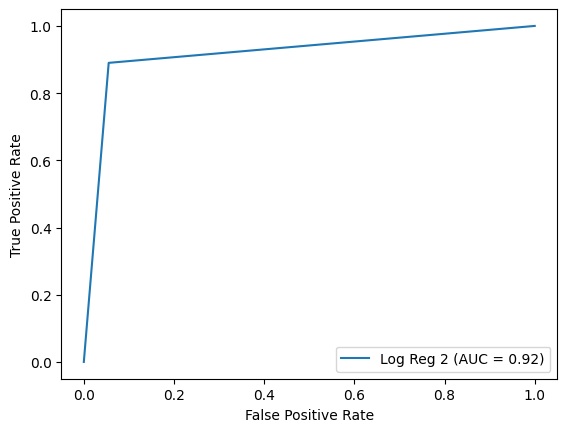

In [202]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_log2_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Log Reg 2')
display.plot()
plt.show()

## k nearest neighbors

Default hyperparameters

In [333]:
begin = time.time()
knn1 = Pipeline(steps=[('ct', CT),
                            ('knn', KNeighborsClassifier())])
knn1.fit(X_train, y_train)
y_knn1_pred = knn1.predict(X_train)
end = time.time()
knn1_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {knn1_time} seconds.
""")


The total time to fit and predict for this model is 18.7981 seconds.



In [334]:
knn1_scores = cross_validate(knn1, X_train, y_train, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

In [335]:
knn1_results = results(knn1_scores)

In [336]:
print_results(knn1_results)


    The mean train accuracy score is 0.9941.
    The mean test accuracy score is 0.9906. 

    The mean train recall score is 0.99.
    The mean test recall score is 0.9845. 

    The mean train precision score is 0.9955.
    The mean test precision score is 0.9924. 

    The mean train f1 score is 0.9927.
    The mean test f1 score is 0.9884.
    


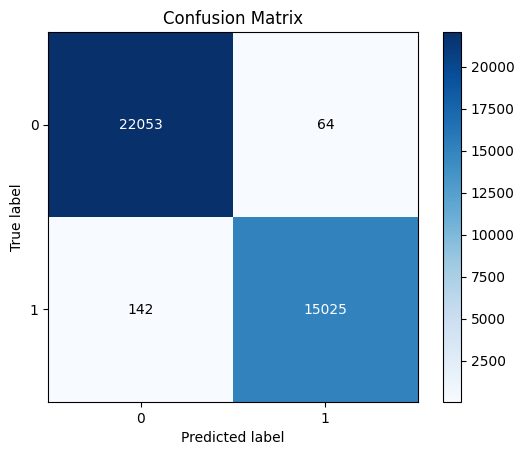

In [339]:
skplt.metrics.plot_confusion_matrix(y_train, y_knn1_pred, normalize=False)
plt.show()

In [340]:
print(classification_report(y_train, y_knn1_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22117
           1       1.00      0.99      0.99     15167

    accuracy                           0.99     37284
   macro avg       0.99      0.99      0.99     37284
weighted avg       0.99      0.99      0.99     37284



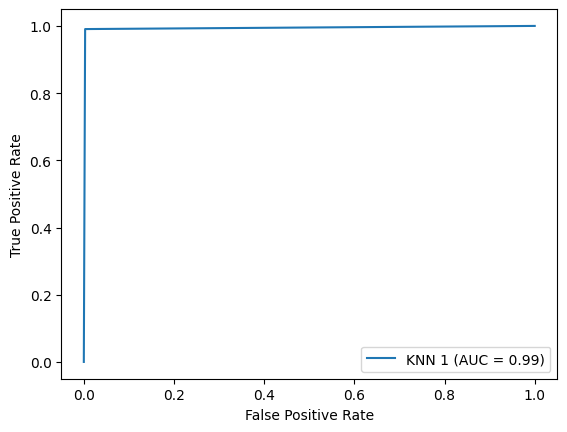

In [341]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_knn1_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='KNN 1')
display.plot()
plt.show()

### Tuned kNN

defining n_neighbors

In [342]:
begin = time.time()
knn2 = Pipeline(steps=[('ct', CT),
                            ('knn2', KNeighborsClassifier(n_neighbors=3))])
knn2.fit(X_train, y_train)
y_knn2_pred = knn2.predict(X_train)
end = time.time()
knn2_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {knn2_time} seconds.
""")


The total time to fit and predict for this model is 13.6103 seconds.



In [343]:
knn2_scores = cross_validate(knn2, X_train, y_train, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

In [344]:
knn2_results = results(knn2_scores)

In [345]:
print_results(knn2_results)


    The mean train accuracy score is 0.9963.
    The mean test accuracy score is 0.9915. 

    The mean train recall score is 0.9938.
    The mean test recall score is 0.9862. 

    The mean train precision score is 0.997.
    The mean test precision score is 0.9928. 

    The mean train f1 score is 0.9954.
    The mean test f1 score is 0.9895.
    


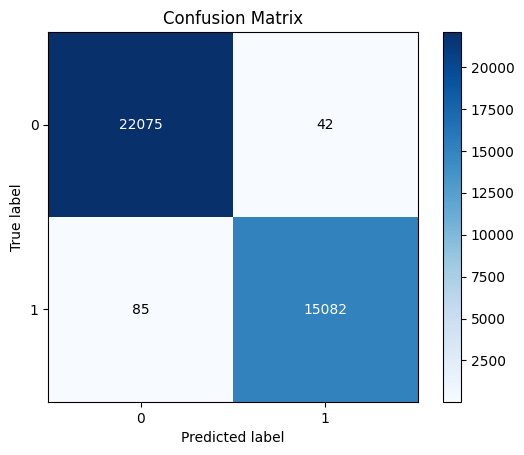

In [347]:
skplt.metrics.plot_confusion_matrix(y_train, y_knn2_pred, normalize=False)
plt.show()

In [348]:
print(classification_report(y_train, y_knn2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22117
           1       1.00      0.99      1.00     15167

    accuracy                           1.00     37284
   macro avg       1.00      1.00      1.00     37284
weighted avg       1.00      1.00      1.00     37284



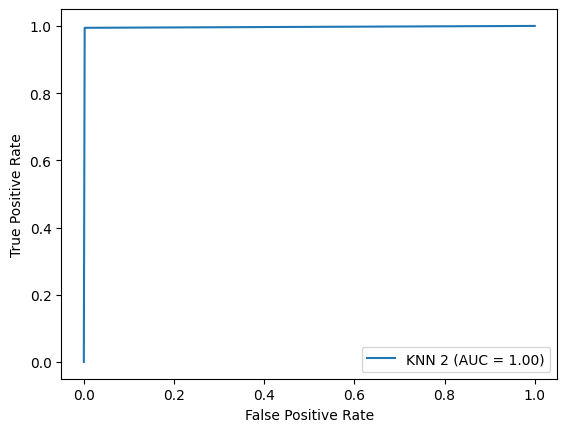

In [349]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_knn2_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='KNN 2')
display.plot()
plt.show()

False negatives down from 142 to 85, but the goal is down to zero.

## GridSearchCV for kNN

In [351]:
knn_gs = Pipeline(steps=[('ct', CT),
                            ('knn', KNeighborsClassifier())])

In [352]:
params = {}
params['knn__n_neighbors'] = [1, 3, 5, 11]
params['knn__metric'] = ['minkowski', 'manhattan']
params['knn__weights'] = ['uniform', 'distance']

knn_gs1 = GridSearchCV(estimator=knn_gs,
                 param_grid=params,
                 cv=5,
                 verbose=3,
                 n_jobs=-2)

In [353]:
knn_gs1.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['Acc(X)',
                                                                          'Acc(Y)',
                                                                          'Acc(Z)',
                                                                          'Rot(X)',
                                                                          'Rot(Y)',
                                                                          'Rot(Z)',
                                                     

In [354]:
knn_gs1.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

In [355]:
knn_gs1.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['Acc(X)', 'Acc(Y)', 'Acc(Z)',
                                                   'Rot(X)', 'Rot(Y)', 'Rot(Z)',
                                                   'Pitch', 'Roll', 'Yaw']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['File'])])),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=1))])

In [356]:
knn_gs1_scores = cross_validate(knn_gs1.best_estimator_, X_train, y_train, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

In [357]:
knn_gs1_results = results(knn_gs1_scores)

In [358]:
print_results(knn_gs1_results)


    The mean train accuracy score is 1.0.
    The mean test accuracy score is 0.9962. 

    The mean train recall score is 1.0.
    The mean test recall score is 0.9942. 

    The mean train precision score is 1.0.
    The mean test precision score is 0.9964. 

    The mean train f1 score is 1.0.
    The mean test f1 score is 0.9953.
    


In [360]:
begin = time.time()
knn_gs1.best_estimator_.fit(X_train, y_train)
y_pred_knn_gs1 = knn_gs1.best_estimator_.predict(X_train)
end = time.time()
knn_gs1_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {knn_gs1_time} seconds.
""")


The total time to fit and predict for this model is 19.7079 seconds.



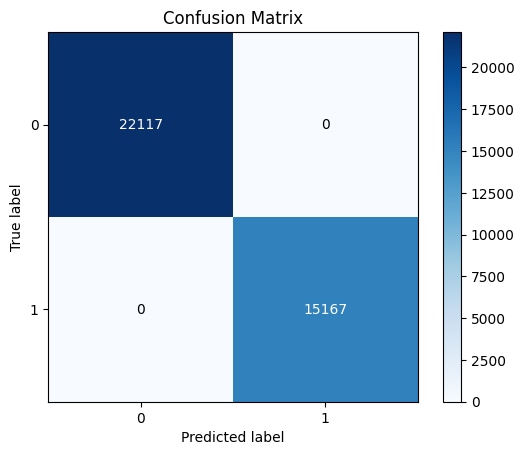

In [361]:
skplt.metrics.plot_confusion_matrix(y_train, y_pred_knn_gs1, normalize=False)
plt.show()

In [362]:
print(classification_report(y_train, y_pred_knn_gs1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22117
           1       1.00      1.00      1.00     15167

    accuracy                           1.00     37284
   macro avg       1.00      1.00      1.00     37284
weighted avg       1.00      1.00      1.00     37284



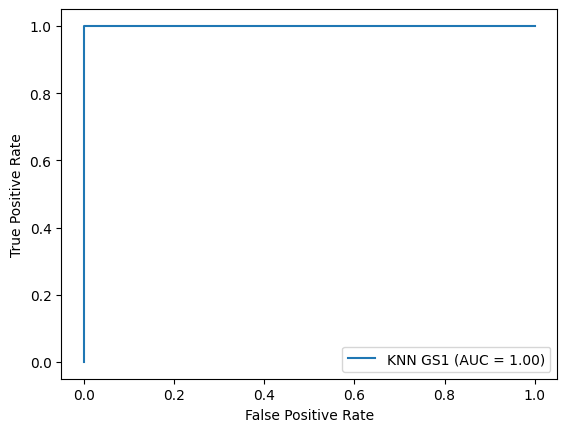

In [363]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_knn_gs1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='KNN GS1')
display.plot()
plt.show()

## Decision Tree

In [369]:
begin = time.time()
dt_pipe = Pipeline(steps=[('ct', CT),
                            ('dt', DecisionTreeClassifier(random_state=24))])
dt_pipe.fit(X_train, y_train)
y_dt_pred = dt_pipe.predict(X_train)
end = time.time()
dt_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {dt_time} seconds.
""")


The total time to fit and predict for this model is 0.437 seconds.



In [365]:
dt_pipe_scores = cross_validate(dt_pipe, X_train, y_train, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

In [366]:
dt_results = results(dt_pipe_scores)

In [367]:
print_results(dt_results)


    The mean train accuracy score is 1.0.
    The mean test accuracy score is 0.9855. 

    The mean train recall score is 1.0.
    The mean test recall score is 0.9812. 

    The mean train precision score is 1.0.
    The mean test precision score is 0.9831. 

    The mean train f1 score is 1.0.
    The mean test f1 score is 0.9821.
    


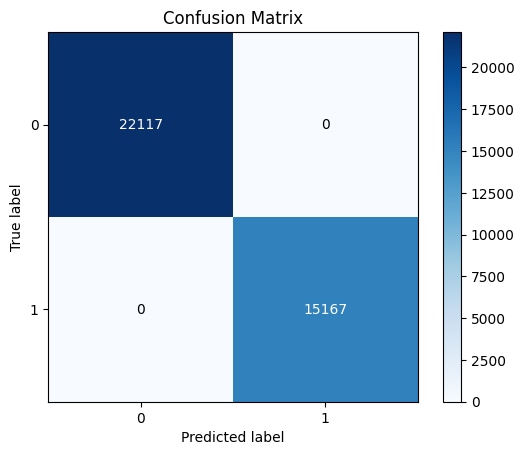

In [370]:
skplt.metrics.plot_confusion_matrix(y_train, y_dt_pred, normalize=False)
plt.show()

# classifying 100% correctly

In [372]:
print(classification_report(y_train, y_dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22117
           1       1.00      1.00      1.00     15167

    accuracy                           1.00     37284
   macro avg       1.00      1.00      1.00     37284
weighted avg       1.00      1.00      1.00     37284



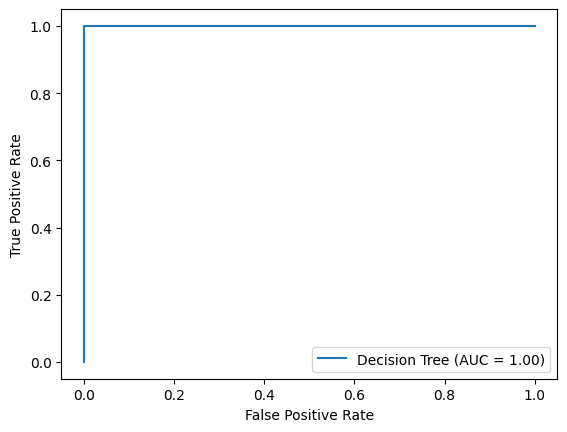

In [373]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_dt_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Decision Tree')
display.plot()
plt.show()

# these are all ridiculous

## Random Forest

In [374]:
begin = time.time()
rfc1 = Pipeline([('ct', CT), ('rfc', RandomForestClassifier(random_state=24))])
rfc1.fit(X_train, y_train)
y_rfc1_pred = rfc1.predict(X_train)
end = time.time()
rfc1_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {rfc1_time} seconds.
""")


The total time to fit and predict for this model is 5.2216 seconds.



In [375]:
rfc1_scores = cross_validate(rfc1, X_train, y_train, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

In [376]:
rfc1_results = results(rfc1_scores)

In [377]:
print_results(rfc1_results)


    The mean train accuracy score is 1.0.
    The mean test accuracy score is 0.9941. 

    The mean train recall score is 1.0.
    The mean test recall score is 0.9884. 

    The mean train precision score is 1.0.
    The mean test precision score is 0.9971. 

    The mean train f1 score is 1.0.
    The mean test f1 score is 0.9927.
    


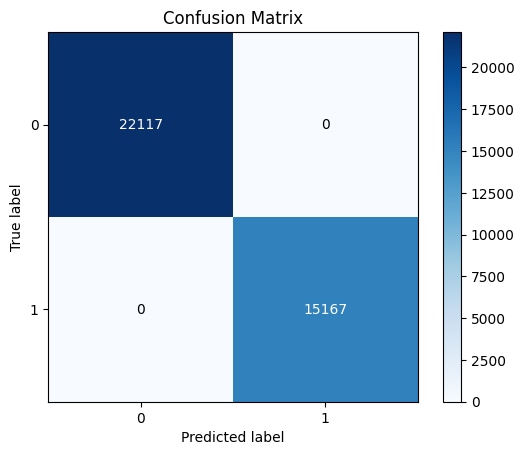

In [378]:
skplt.metrics.plot_confusion_matrix(y_train, y_rfc1_pred, normalize=False)
plt.show()

# Also classifying 100% correctly

In [379]:
print(classification_report(y_train, y_rfc1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22117
           1       1.00      1.00      1.00     15167

    accuracy                           1.00     37284
   macro avg       1.00      1.00      1.00     37284
weighted avg       1.00      1.00      1.00     37284



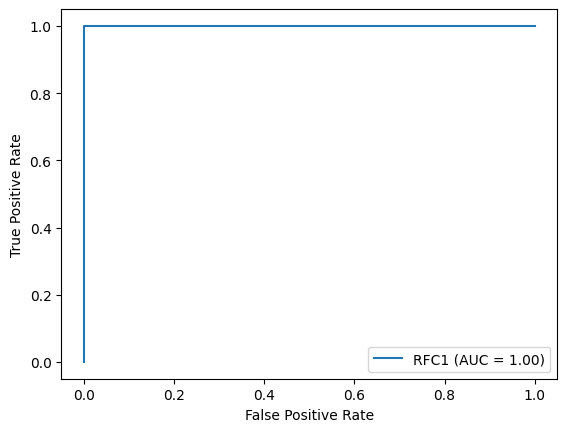

In [380]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_rfc1_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='RFC1')
display.plot()
plt.show()

## GridSearch for RFC

In [ ]:
# using same rfc1 from above

In [382]:
# picking params above and below, and including, defaults

params = {}
params['rfc__n_estimators'] = [50, 100, 200]
params['rfc__min_samples_leaf'] = [1, 3, 5]

rfc_gs1 = GridSearchCV(estimator=rfc1,
                 param_grid=params,
                 cv=5,
                 verbose=3,
                 n_jobs=-2)

In [383]:
rfc_gs1.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['Acc(X)',
                                                                          'Acc(Y)',
                                                                          'Acc(Z)',
                                                                          'Rot(X)',
                                                                          'Rot(Y)',
                                                                          'Rot(Z)',
                                                     

In [384]:
rfc_gs1.best_params_

{'rfc__min_samples_leaf': 1, 'rfc__n_estimators': 200}

In [385]:
rfc_gs1.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['Acc(X)', 'Acc(Y)', 'Acc(Z)',
                                                   'Rot(X)', 'Rot(Y)', 'Rot(Z)',
                                                   'Pitch', 'Roll', 'Yaw']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['File'])])),
                ('rfc',
                 RandomForestClassifier(n_estimators=200, random_state=24))])

In [386]:
rfc_gs1_scores = cross_validate(rfc_gs1.best_estimator_, X_train, y_train, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

In [387]:
rfc_gs1_results = results(rfc_gs1_scores)

In [388]:
print_results(rfc_gs1_results)


    The mean train accuracy score is 1.0.
    The mean test accuracy score is 0.9941. 

    The mean train recall score is 1.0.
    The mean test recall score is 0.9887. 

    The mean train precision score is 1.0.
    The mean test precision score is 0.9967. 

    The mean train f1 score is 1.0.
    The mean test f1 score is 0.9927.
    


In [389]:
begin = time.time()
rfc_gs1.best_estimator_.fit(X_train, y_train)
y_pred_rfc_gs1 = rfc_gs1.best_estimator_.predict(X_train)
end = time.time()
rfc_gs1_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {rfc_gs1_time} seconds.
""")


The total time to fit and predict for this model is 8.5909 seconds.



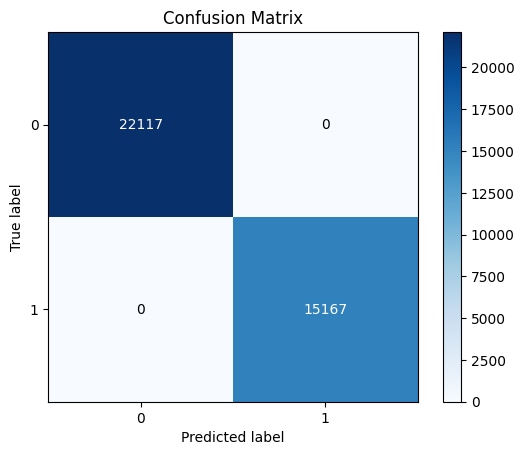

In [391]:
skplt.metrics.plot_confusion_matrix(y_train, y_pred_rfc_gs1, normalize=False)
plt.show()

In [390]:
print(classification_report(y_train, y_pred_rfc_gs1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22117
           1       1.00      1.00      1.00     15167

    accuracy                           1.00     37284
   macro avg       1.00      1.00      1.00     37284
weighted avg       1.00      1.00      1.00     37284



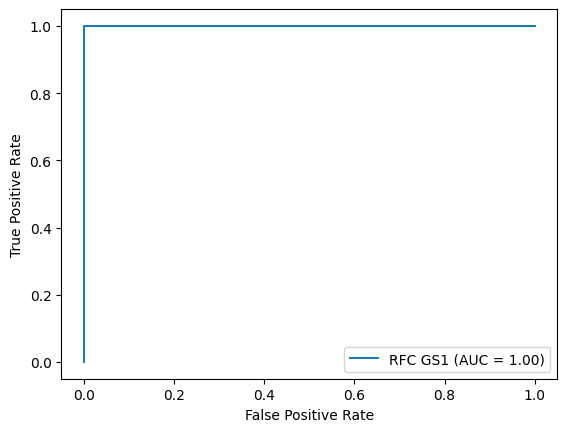

In [467]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_rfc_gs1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='RFC GS1')
display.plot()
plt.show()

Compare models thus far...

So far knn from GridSearch (manhattan, n_neighbors = 1, weifghts = uniform) is the best performer still?

## Stacking Classifiers

In [ ]:
X_tr_ct = CT.fit_transform(X_train)

In [397]:
begin = time.time()
estimators = [
    ('logreg_est', LogisticRegression(random_state=24)),
    ('knn_est', KNeighborsClassifier()),
    ('dt_est', DecisionTreeClassifier(random_state=24))
]

sc = StackingClassifier(estimators)

sc.fit(X_tr_ct, y_train)
y_sc_pred = sc.predict(X_tr_ct)
end = time.time()
sc_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {sc_time} seconds.
""")


The total time to fit and predict for this model is 35.3704 seconds.



In [160]:
sc.score(X_tr_ct, y_train)

0.9985248363909451

In [398]:
sc_scores = cross_validate(sc, X_tr_ct, y_train, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

In [399]:
sc_results = results(sc_scores)

In [400]:
print_results(sc_results)


    The mean train accuracy score is 0.9981.
    The mean test accuracy score is 0.993. 

    The mean train recall score is 0.9973.
    The mean test recall score is 0.9887. 

    The mean train precision score is 0.9981.
    The mean test precision score is 0.994. 

    The mean train f1 score is 0.9977.
    The mean test f1 score is 0.9913.
    


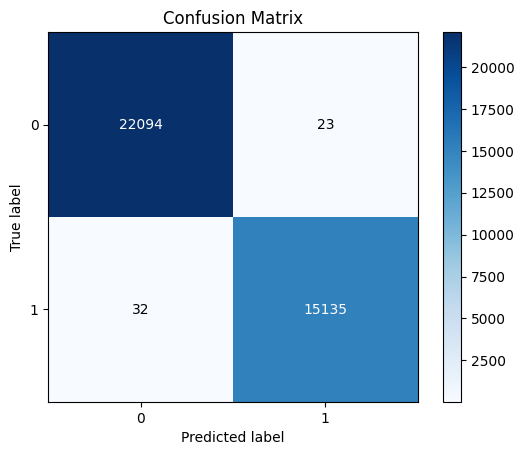

In [401]:
skplt.metrics.plot_confusion_matrix(y_train, y_sc_pred, normalize=False)
plt.show()

Actually not as good as some of the individual classifiers above

In [402]:
print(classification_report(y_train, y_sc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22117
           1       1.00      1.00      1.00     15167

    accuracy                           1.00     37284
   macro avg       1.00      1.00      1.00     37284
weighted avg       1.00      1.00      1.00     37284



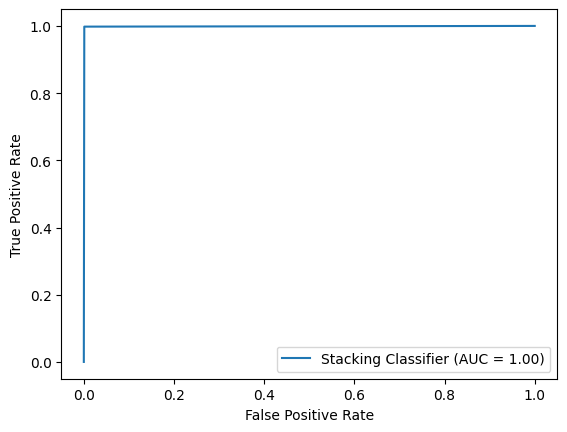

In [403]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_sc_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Stacking Classifier')
display.plot()
plt.show()

## Gradient Boosting

In [404]:
begin = time.time()
gbc = GradientBoostingClassifier(random_state=24)
gbc.fit(X_tr_ct, y_train)
y_gbc_pred = gbc.predict(X_tr_ct)
end = time.time()
gbc_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {gbc_time} seconds.
""")


The total time to fit and predict for this model is 7.5259 seconds.



In [405]:
gbc_scores = cross_validate(gbc, X_tr_ct, y_train, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

In [407]:
gbc_results = results(gbc_scores)

In [408]:
print_results(gbc_results)


    The mean train accuracy score is 0.9879.
    The mean test accuracy score is 0.9854. 

    The mean train recall score is 0.978.
    The mean test recall score is 0.9748. 

    The mean train precision score is 0.9922.
    The mean test precision score is 0.989. 

    The mean train f1 score is 0.9851.
    The mean test f1 score is 0.9819.
    


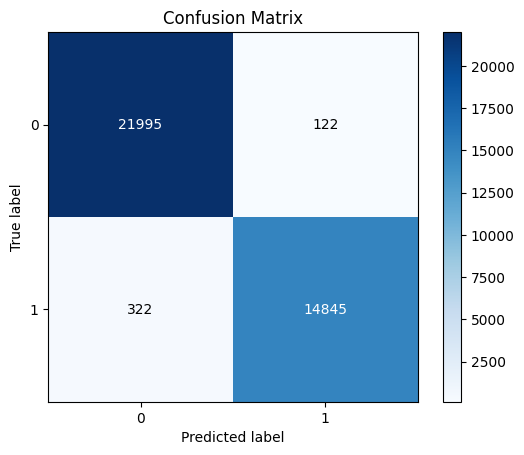

In [409]:
skplt.metrics.plot_confusion_matrix(y_train, y_gbc_pred, normalize=False)
plt.show()

Booooo!!  Hissssss!!  This is hot garbage :)

In [411]:
print(classification_report(y_train, y_gbc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22117
           1       0.99      0.98      0.99     15167

    accuracy                           0.99     37284
   macro avg       0.99      0.99      0.99     37284
weighted avg       0.99      0.99      0.99     37284



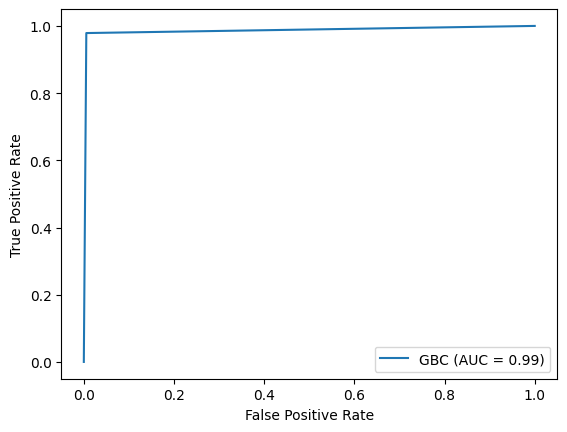

In [419]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_gbc_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='GBC')
display.plot()
plt.show()

## XG Boost

In [412]:
begin = time.time()
XG_boost1 = xgboost.XGBClassifier(random_state=24)
XG_boost1.fit(X_tr_ct, y_train)
y_XGB_pred = XG_boost1.predict(X_tr_ct)
end = time.time()
XG_boost1_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {XG_boost1_time} seconds.
""")

C:\Users\JonMc\anaconda3\envs\streamlit_09\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

The total time to fit and predict for this model is 1.2146 seconds.



In [413]:
XG_boost1_scores = cross_validate(XG_boost1, X_tr_ct, y_train, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

C:\Users\JonMc\anaconda3\envs\streamlit_09\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JonMc\anaconda3\envs\streamlit_09\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JonMc\anaconda3\envs\streamlit_09\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JonMc\anaconda3\envs\streamlit_09\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JonMc\anaconda3\envs\streamlit_09\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [414]:
XG_boost1_results = results(XG_boost1_scores)

In [415]:
print_results(XG_boost1_results)


    The mean train accuracy score is 1.0.
    The mean test accuracy score is 0.9971. 

    The mean train recall score is 1.0.
    The mean test recall score is 0.9944. 

    The mean train precision score is 1.0.
    The mean test precision score is 0.9985. 

    The mean train f1 score is 1.0.
    The mean test f1 score is 0.9964.
    


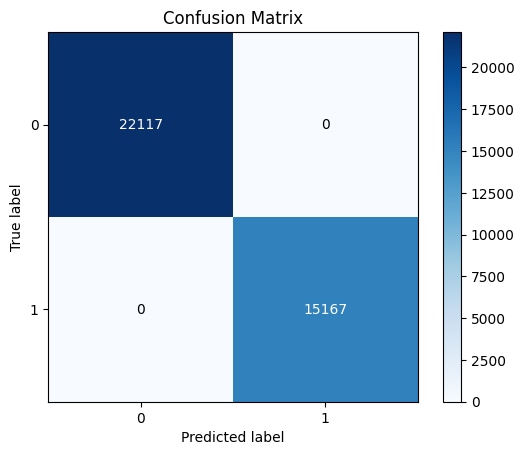

In [416]:
skplt.metrics.plot_confusion_matrix(y_train, y_XGB_pred, normalize=False)
plt.show()

In [417]:
print(classification_report(y_train, y_XGB_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22117
           1       1.00      1.00      1.00     15167

    accuracy                           1.00     37284
   macro avg       1.00      1.00      1.00     37284
weighted avg       1.00      1.00      1.00     37284



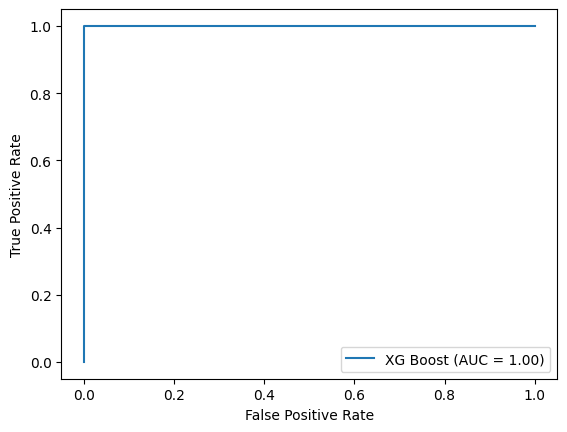

In [418]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_XGB_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='XG Boost')
display.plot()
plt.show()

## Considering a different type of model

What if it is too computationlly expensive for second-to-second real-time modeling to monitor someone?  Could the system receive a snapshot of intermittent updates (every 5 sec, or even 10 sec) to monitor someone's positionining and make aggregate calculations from that?  We could simulate that circumstance by using the df_feat dataset.

In [420]:
df_feat.head()

,Index,Acceleration Mean,Rotation Mean,Acceleration Variance,Rotation Variance,Acc Y Mean,Acc Z Mean,Rot Y Mean,Rot Z Mean,Max Acceleration,...,Yaw,Timestamp,Fall,Acc Y Stdev,Acc Z Stdev,Rot Y Stdev,Rot Z Stdev,Fourier Acc Coef,Fourier Rot Coef,File
0,1,1.300608,41.745840,1.274991,148.636248,-0.125055,0.453730,3.412917,1.036585,9.392141,...,358.229492,1612546353614,0,0.483726,1.312748,109.027999,19.364234,92.343149,2963.954659,Subject1
1,2,1.239625,52.031510,1.069585,195.726419,-0.089449,0.413064,6.641859,1.184541,7.485130,...,359.792999,1612546357756,0,0.391341,1.206264,175.210145,6.265235,84.294529,3538.142670,Subject1
2,3,1.529465,89.170260,1.733220,262.935521,-0.087678,0.515523,7.205940,4.921322,11.018893,...,0.008551,1612546361670,0,1.210065,1.427617,154.932945,40.829397,94.826840,5528.556094,Subject1
3,4,1.060228,10.202447,0.237082,39.333528,-0.130035,0.457962,-6.646342,0.395517,2.969044,...,358.421753,1612546366033,0,0.064298,0.280493,35.358783,3.789023,78.456869,754.981105,Subject1
4,5,1.222219,30.061889,1.283746,120.337842,-0.140402,0.477546,-13.010453,0.682056,11.576874,...,357.713165,1612546370850,0,0.250743,1.194289,95.576180,6.248497,85.555305,2104.332225,Subject1


In [421]:
df_feat.shape

(765, 26)

In [422]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Index                  765 non-null    int64  
 1   Acceleration Mean      765 non-null    float64
 2   Rotation Mean          765 non-null    float64
 3   Acceleration Variance  765 non-null    float64
 4   Rotation Variance      765 non-null    float64
 5   Acc Y Mean             765 non-null    float64
 6   Acc Z Mean             765 non-null    float64
 7   Rot Y Mean             765 non-null    float64
 8   Rot Z Mean             765 non-null    float64
 9   Max Acceleration       765 non-null    float64
 10  Max Rotation           765 non-null    float64
 11  First Acceleration     765 non-null    float64
 12  Last Acceleration      765 non-null    float64
 13  Fall Time              765 non-null    int64  
 14  Pitch                  765 non-null    float64
 15  Roll  

In [423]:
# we will copy df_feat
df2 = df_feat.copy()

In [424]:
df_feat.corr()['Fall']

C:\Users\JonMc\AppData\Local\Temp\ipykernel_27036\1347279475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_feat.corr()['Fall']


Index                    0.852075
Acceleration Mean        0.393049
Rotation Mean            0.644353
Acceleration Variance    0.131509
Rotation Variance        0.141548
Acc Y Mean               0.030461
Acc Z Mean              -0.204462
Rot Y Mean               0.074274
Rot Z Mean              -0.009494
Max Acceleration         0.061260
Max Rotation            -0.029804
First Acceleration      -0.028811
Last Acceleration       -0.197886
Fall Time                0.199351
Pitch                   -0.157198
Roll                    -0.848256
Yaw                     -0.189486
Timestamp                0.046914
Fall                     1.000000
Acc Y Stdev              0.579235
Acc Z Stdev              0.175794
Rot Y Stdev              0.144437
Rot Z Stdev              0.698321
Fourier Acc Coef        -0.000304
Fourier Rot Coef         0.543585
Name: Fall, dtype: float64

We will drop 'Index' because it's like 'Feature Line' from df_raw in that it identifies the task being performed, and would therefore be a separate variable that can distinguish whether or not a fall is occurring.

In [425]:
# dropping 'Index'
df2.drop(['Index'], axis=1, inplace=True)

In [426]:
# dropping 'Timestamp' as well
df2.drop(['Timestamp'], axis=1, inplace=True)

In [427]:
# sanity check
df2.shape

(765, 24)

In [428]:
# train-text split
X2 = df2.drop(['Fall'], axis=1)
y2 = df2['Fall']
X_tr_2, X_te_2, y_tr_2, y_te_2 = train_test_split(X2, y2, random_state=24)

In [429]:
# new pipeline
subpipe_num_2 = Pipeline(steps=[('ss', StandardScaler())])
subpipe_cat_2 = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [430]:
# new categories to consider
num_feats_2 = list(X2.select_dtypes(include=['number']).columns)
cat_feats_2 = ['File']

In [431]:
CT_2 = ColumnTransformer(transformers=[('subpipe_num', subpipe_num_2, num_feats_2),
                                     ('subpipe_cat', subpipe_cat_2, cat_feats_2)],
                                     remainder='passthrough')

### Let's revisit the best kNN model from above

In [433]:
knn_gs1.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

In [437]:
begin = time.time()
df2_knn = Pipeline(steps=[('ct2', CT_2),
                            ('knn2', KNeighborsClassifier(
                                metric='manhattan',
                            n_neighbors=1,
                            weights='uniform'))])
df2_knn.fit(X_tr_2, y_tr_2)
y_pred_df2_knn = df2_knn.predict(X_tr_2)
end = time.time()
df2_knn_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {df2_knn_time} seconds.
""")


The total time to fit and predict for this model is 0.0219 seconds.



In [438]:
df2_knn_scores = cross_validate(df2_knn, X_tr_2, y_tr_2, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

In [439]:
df2_knn_results = results(df2_knn_scores)

In [440]:
print_results(df2_knn_results)


    The mean train accuracy score is 1.0.
    The mean test accuracy score is 0.9913. 

    The mean train recall score is 1.0.
    The mean test recall score is 0.9833. 

    The mean train precision score is 1.0.
    The mean test precision score is 0.9958. 

    The mean train f1 score is 1.0.
    The mean test f1 score is 0.9895.
    


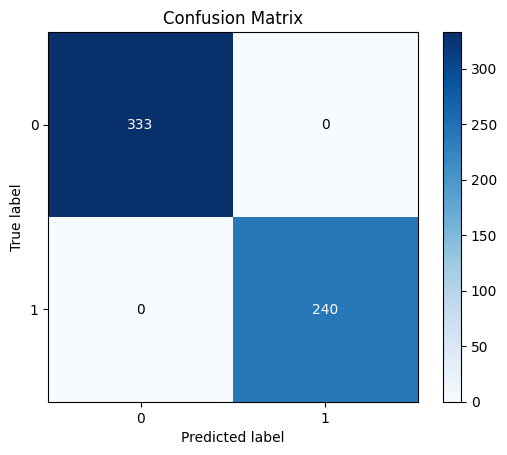

In [441]:
skplt.metrics.plot_confusion_matrix(y_tr_2, y_pred_df2_knn, normalize=False)
plt.show()

In [442]:
print(classification_report(y_tr_2, y_pred_df2_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       240

    accuracy                           1.00       573
   macro avg       1.00      1.00      1.00       573
weighted avg       1.00      1.00      1.00       573



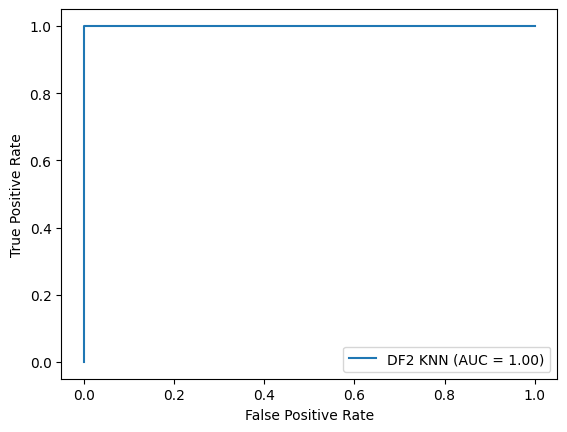

In [443]:
fpr, tpr, thresholds = metrics.roc_curve(y_tr_2, y_pred_df2_knn)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='DF2 KNN')
display.plot()
plt.show()

## with XG boost

In [444]:
begin = time.time()
df2_XGboost = Pipeline(steps=[('ct2', CT_2),
                            ('xgb2', xgboost.XGBClassifier(random_state=24))])
df2_XGboost.fit(X_tr_2, y_tr_2)
y_pred_df2_xgb = df2_XGboost.predict(X_tr_2)
end = time.time()
df2_XGB_time = (round(end - begin, 4))
print(f"""
The total time to fit and predict for this model is {df2_XGB_time} seconds.
""")

[17:23:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

The total time to fit and predict for this model is 0.0512 seconds.



C:\Users\JonMc\anaconda3\envs\streamlit_09\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [445]:
df2_XGboost_scores = cross_validate(df2_XGboost, X_tr_2, y_tr_2, cv=5,
                                scoring=('accuracy', 'recall', 'precision', 'f1'),
                                return_train_score=True)

C:\Users\JonMc\anaconda3\envs\streamlit_09\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\JonMc\anaconda3\envs\streamlit_09\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\JonMc\anaconda3\envs\streamlit_09\lib\site-pack

[17:23:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\JonMc\anaconda3\envs\streamlit_09\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [446]:
df2_XGboost_results = results(df2_XGboost_scores)

In [447]:
print_results(df2_XGboost_results)


    The mean train accuracy score is 1.0.
    The mean test accuracy score is 0.9739. 

    The mean train recall score is 1.0.
    The mean test recall score is 0.9625. 

    The mean train precision score is 1.0.
    The mean test precision score is 0.9758. 

    The mean train f1 score is 1.0.
    The mean test f1 score is 0.9685.
    


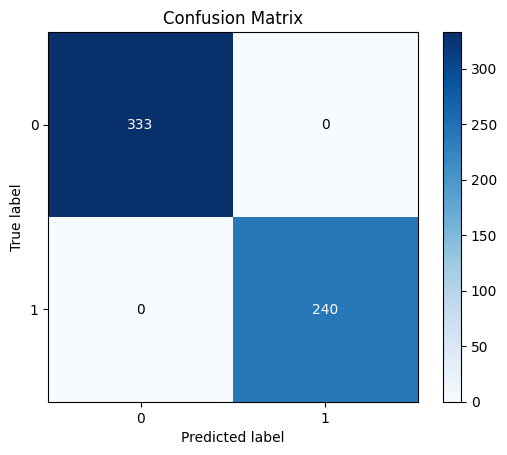

In [448]:
skplt.metrics.plot_confusion_matrix(y_tr_2, y_pred_df2_xgb, normalize=False)
plt.show()

In [449]:
print(classification_report(y_tr_2, y_pred_df2_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       240

    accuracy                           1.00       573
   macro avg       1.00      1.00      1.00       573
weighted avg       1.00      1.00      1.00       573



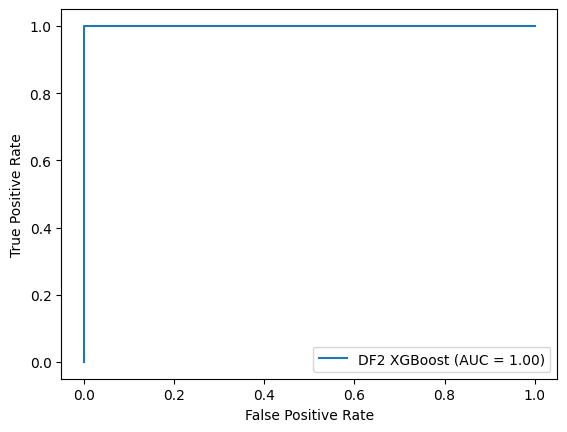

In [450]:
fpr, tpr, thresholds = metrics.roc_curve(y_tr_2, y_pred_df2_xgb)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='DF2 XGBoost')
display.plot()
plt.show()

<a id='final'></a>
# Evaluation

My chosen metrics for evaluation are accuracy, recall (aiming to reduce false negatives, therefore catching almost all or all of the falls that occurred in the data), precision and f1 score, as well as viewing the confusion matrix and ROC for each model.  The MVP involves finding the best model with the highest accuracy and recall possible in a reasonable timeframe with the computational resources I have available.  The smaller project I hope to accomplish this first week is to get through Random Forest models and into Grid Searching to optimize those models.  XG boosting will likely have to wait until next week.  For a level up, I am considering deploying the best model with examples and explanations via Streamlit

### Visuals

In [ ]:
# define X and y

In [ ]:
# y_sort = sorted(y, reverse=True)
# y_sort

In [ ]:
# fig, ax = plt.subplots()
# plt.bar(X, y_sort, color=['black', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green'])
# plt.xticks(rotation=25)
# plt.ylim(0.8, 0.95)
# plt.grid(False)
# ax.set_title("Surprise Models")
# plt.ylabel('Root Mean Squared Error (RMSE)')
# plt.savefig('images/suprise_models_bar.png', dpi=300, bbox_inches='tight');

In [533]:
models = ['logreg1', 'logreg2', 'knn1', 'knn2', 'knn_gs1', 'dt', 'rfc1', 'rfc_gs1', 'sc', 'gbc', 'XG_boost1']

In [535]:
results = [logreg1_results, logreg2_results, knn1_results, knn2_results, knn_gs1_results, dt_results, 
          rfc1_results, rfc_gs1_results, sc_results, gbc_results, XG_boost1_results]
train_accuracy_list = []
test_accuracy_list = []
train_recall_list = []
test_recall_list = []
train_precision_list = []
test_precision_list = []
train_f1_list = []
test_f1_list = []

def metric():
    for result in results:
        train_accuracy_list.append(result._train_accuracy)
        test_accuracy_list.append(result._test_accuracy)
        train_recall_list.append(result._train_recall)
        test_recall_list.append(result._test_recall)
        train_precision_list.append(result._train_precision)
        test_precision_list.append(result._test_precision)
        train_f1_list.append(result._train_f1)
        test_f1_list.append(result._test_f1)

In [536]:
metric()

In [540]:
for i, (model, train_acc) in enumerate(zip(models, train_accuracy_list)):
    print(i, model, train_acc)

0 logreg1 0.920850773410202
1 logreg2 0.9224063990054416
2 knn1 0.9941060499976129
3 knn2 0.9962517416210602
4 knn_gs1 1.0
5 dt 1.0
6 rfc1 1.0
7 rfc_gs1 1.0
8 sc 0.9981493390302566
9 gbc 0.9879237726524149
10 XG_boost1 1.0


In [546]:
train_acc = zip(models, train_accuracy_list)
print(set(train_acc))

{('knn1', 0.9941060499976129), ('knn_gs1', 1.0), ('rfc1', 1.0), ('rfc_gs1', 1.0), ('gbc', 0.9879237726524149), ('dt', 1.0), ('sc', 0.9981493390302566), ('XG_boost1', 1.0), ('logreg1', 0.920850773410202), ('logreg2', 0.9224063990054416), ('knn2', 0.9962517416210602)}


In [547]:
train_acc_dict = {models: train_accuracy_list for models, train_accuracy_list in zip(models, train_accuracy_list)}
print(train_acc_dict)

{'logreg1': 0.920850773410202, 'logreg2': 0.9224063990054416, 'knn1': 0.9941060499976129, 'knn2': 0.9962517416210602, 'knn_gs1': 1.0, 'dt': 1.0, 'rfc1': 1.0, 'rfc_gs1': 1.0, 'sc': 0.9981493390302566, 'gbc': 0.9879237726524149, 'XG_boost1': 1.0}


In [557]:
list(train_acc_dict.values())

[0.920850773410202,
 0.9224063990054416,
 0.9941060499976129,
 0.9962517416210602,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9981493390302566,
 0.9879237726524149,
 1.0]

In [554]:
train_acc_list = list((train_acc_dict.values())[0:]

SyntaxError: incomplete input (2666647731.py, line 1)

In [ ]:
#  Comparing fit & predict time by model

fig, ax = plt.subplots()
plt.bar(X, y_sort, color=['black', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green'])
plt.xticks(rotation=25)
plt.ylim(0.0, 15.0)
plt.grid(False)
ax.set_title("Time for Model Fit & Predict")
plt.ylabel("Time (sec)")
# plt.savefig('images/suprise_models_bar.png', dpi=300, bbox_inches='tight');

In [ ]:
# Comparing accuracy scores

X = 

## Evaluation on X_test

## Loading separate test_data

In [188]:
# ! unzip test_dataset.zip

In [189]:
# can replace this pathname with the full path to the folder locally
path_raw = r'C:\Users\JonMc\Documents\Flatiron\Fall_Detection_Model\data\test_dataset' 

# Get the files from the path provided
files_raw = Path(path_raw).glob('*.csv') 

In [190]:
dfs_test = []
for f in files_raw:
    data = pd.read_csv(f)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['File'] = f.stem
    dfs_test.append(data)

In [213]:
# concatenating all 17 files into one dataframe
df_test = pd.concat(dfs_test, ignore_index=True)

In [214]:
df_test.head()

,Feature Line,Acc(X),Acc(Y),Acc(Z),Rot(X),Rot(Y),Rot(Z),Timestamp,Fall,File
0,0,0.188965,-2.758545,2.326172,-10.955224,178.574627,103.470149,1.132324e+06,1,Subject1
1,0,0.981689,-3.999512,0.450317,-21.641791,144.716418,206.097015,1.132335e+06,1,Subject1
2,0,-0.514038,-2.499146,-1.742432,184.171642,209.865672,221.507463,1.132355e+06,1,Subject1
3,0,-2.666138,-1.324951,-0.175293,176.156716,240.380597,53.074627,1.132376e+06,1,Subject1
4,0,-1.332886,0.920288,0.447388,244.507463,-109.119403,52.164179,1.132397e+06,1,Subject1


In [215]:
df_test.shape

(6675, 10)

In [216]:
df_test['Fall'].value_counts()

1    3732
0    2943
Name: Fall, dtype: int64

## Processing test data the same as df_raw

In [217]:
# dropping 'Feature Line' and 'Timestamp'

df_test.drop(['Feature Line', 'Timestamp'], axis=1, inplace=True)

In [218]:
df_test.head()

,Acc(X),Acc(Y),Acc(Z),Rot(X),Rot(Y),Rot(Z),Fall,File
0,0.188965,-2.758545,2.326172,-10.955224,178.574627,103.470149,1,Subject1
1,0.981689,-3.999512,0.450317,-21.641791,144.716418,206.097015,1,Subject1
2,-0.514038,-2.499146,-1.742432,184.171642,209.865672,221.507463,1,Subject1
3,-2.666138,-1.324951,-0.175293,176.156716,240.380597,53.074627,1,Subject1
4,-1.332886,0.920288,0.447388,244.507463,-109.119403,52.164179,1,Subject1


In [219]:
df_test.shape

(6675, 8)

In [220]:
# definining X & y for final model
X_test_df = df_test.drop(['Fall'], axis=1)
y_test_df = df_test['Fall']

In [221]:
X_test_df.head()

,Acc(X),Acc(Y),Acc(Z),Rot(X),Rot(Y),Rot(Z),File
0,0.188965,-2.758545,2.326172,-10.955224,178.574627,103.470149,Subject1
1,0.981689,-3.999512,0.450317,-21.641791,144.716418,206.097015,Subject1
2,-0.514038,-2.499146,-1.742432,184.171642,209.865672,221.507463,Subject1
3,-2.666138,-1.324951,-0.175293,176.156716,240.380597,53.074627,Subject1
4,-1.332886,0.920288,0.447388,244.507463,-109.119403,52.164179,Subject1


<a id='summary'></a>
# Summary